In [19]:
from chatminer.chatparsers import WhatsAppParser

In [20]:
import os
FILEPATH = "_chat.txt"
assert os.path.isfile(FILEPATH)

In [21]:
parser = WhatsAppParser(FILEPATH)
parser.parse_file()
df = parser.parsed_messages.get_df(as_pandas=True) # as_pandas=False returns polars dataframe

21.03.2025 09:39:17 INFO     
            Depending on the platform, the message format in chat logs might not be
            standardized across devices/versions/localization and might change over
            time. Please report issues including your message format via GitHub.
            
21.03.2025 09:39:17 INFO     Initialized parser.
21.03.2025 09:39:17 INFO     Starting reading raw messages...
21.03.2025 09:39:17 INFO     Inferred date format: [day/month/year]
21.03.2025 09:39:17 INFO     Finished reading 51067 raw messages.
21.03.2025 09:39:17 INFO     Starting parsing raw messages...
  2%|▏         | 949/51067 [00:00<00:03, 13572.83it/s]


ParserError: Unknown string format: 2025-03-18 14:23:00, 03/18/2025, 18-03-2025 09:00, 20250320, Mar 20, 2025, 2025-03-20T08:30:00, etc. Use pd.to_datetime(df["order_date"

In [ ]:
df['timestamp'].min()

Timestamp('2024-10-25 16:32:01')

In [ ]:
import pandas as pd

df['year_month'] = df['timestamp'].dt.to_period('M')
df['day'] = pd.to_datetime(df['timestamp']).dt.day
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

In [ ]:
df = df[df['author'] != 'Nine quadrillion beers']

In [ ]:
allMessages = df['author'].value_counts()

yappers = list(allMessages.index[0:5])

yapMessages = df[df['author'].isin(yappers)]

In [ ]:
allMessages

,count
author,
Vandad Vafai,6486
Luca Adjei MBD,4509
Isaac Chaljub,3314
Lucas Brunner,2357
Alejandro Perez,2004
Felix,1756
Emin,1537
Youssef Hakim Abdel Nasser MBD,1354
Louis-Esmel Kodo MBD,1179


In [ ]:
monthly = df.groupby('year_month')['author'].value_counts()


In [ ]:
monthlyYap = yapMessages.groupby('year_month')['author'].value_counts().unstack(level=0).fillna(0)

monthlyYapT = monthlyYap.T

In [ ]:
monthly = df.groupby('year_month')['author'].value_counts().unstack(level=0).fillna(0)

monthly

monthlyT = monthly.T

<ipython-input-14-8041ccc954e8>:9: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 2000x500 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


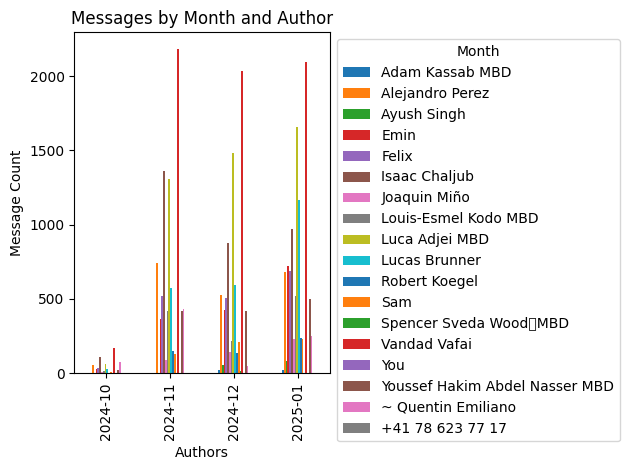

In [ ]:
import matplotlib.pyplot as plt

# Bar Plot
plt.figure(figsize=(20, 5))  # Increase the width (e.g., 12 instead of 8)
monthlyT.plot(kind='bar', title='Messages by Month and Author')
plt.xlabel('Authors')
plt.ylabel('Message Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1))  # Place the legend outside the plot
plt.tight_layout()
plt.show()

<Figure size 2000x500 with 0 Axes>

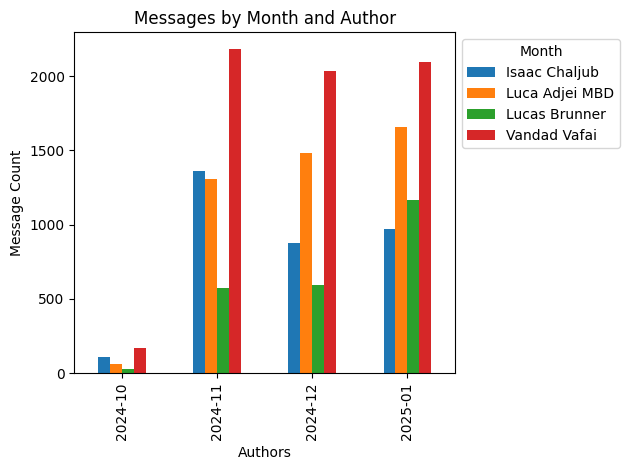

In [ ]:
allMessages = df['author'].value_counts()

yappers = list(allMessages.index[0:4])

yapMessages = df[df['author'].isin(yappers)]

monthlyYap = yapMessages.groupby('year_month')['author'].value_counts().unstack(level=0).fillna(0)

monthlyYapT = monthlyYap.T

plt.figure(figsize=(20, 5))  # Increase the width (e.g., 12 instead of 8)
monthlyYapT.plot(kind='bar', title='Messages by Month and Author')
plt.xlabel('Authors')
plt.ylabel('Message Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1))  # Place the legend outside the plot
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['timestamp', 'author', 'message', 'year_month', 'day', 'hour'], dtype='object')

<ipython-input-17-cf2507095823>:16: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


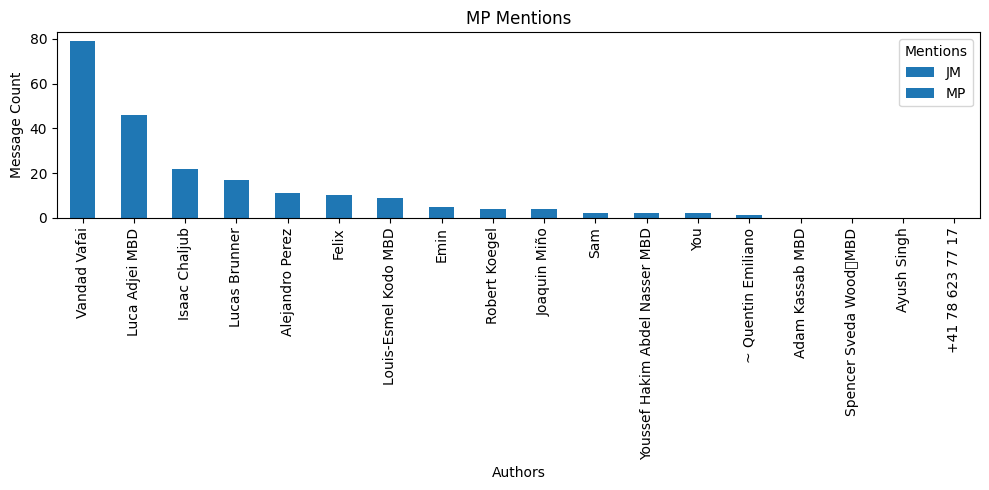

In [ ]:
# Create a boolean column to check if 'text' contains 'apple' (case insensitive)
df['JM'] = df['message'].str.contains('JM', case=True, na=False)
df['MP'] = df['message'].str.contains('MP', case=True, na=False)

jmStats = df.groupby('author')['JM'].sum()
mpStats = df.groupby('author')['MP'].sum()
jmStats = jmStats.sort_values(ascending=False)
mpStats = mpStats.sort_values(ascending=False)

plt.figure(figsize=(10, 5))  # Increase the width (e.g., 12 instead of 8)
jmStats.plot(kind='bar', title='JM Mentions')
mpStats.plot(kind='bar', title='MP Mentions')
plt.xlabel('Authors')
plt.ylabel('Message Count')
plt.legend(title='Mentions', bbox_to_anchor=(1, 1))  # Place the legend outside the plot
plt.tight_layout()
plt.show()

<ipython-input-18-48c30b1b71e4>:16: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


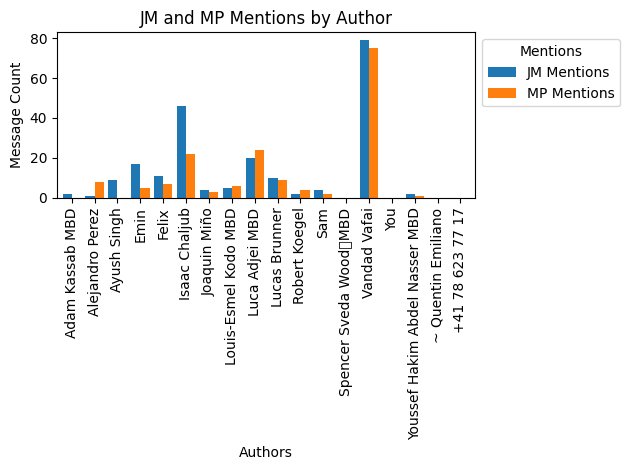

In [ ]:

# Combine jmStats and mpStats into a single DataFrame
combined_stats = pd.DataFrame({
    'JM Mentions': jmStats,
    'MP Mentions': mpStats
})

# Plot the combined DataFrame
plt.figure(figsize=(12, 6))  # Adjust the figure size
combined_stats.plot(kind='bar', title='JM and MP Mentions by Author', width=0.8)

# Add labels and legend
plt.xlabel('Authors')
plt.ylabel('Message Count')
plt.legend(title='Mentions', bbox_to_anchor=(1, 1))  # Move legend outside the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
df['words'] = df['message'].str.split()


allWords = []

for message in df['words']:
  for word in message:
    allWords.append(word)


wordSeries = pd.Series(allWords)

In [ ]:
commonWords = wordSeries.value_counts()

topWords = commonWords.loc[['bro','shit','chill','crazy','ass','diddy','retard','downy','tard','unc','RDJ','cunt']]

topWords.sort_values(ascending=False)

,count
bro,852
shit,304
crazy,195
ass,176
chill,160
diddy,137
unc,31
retard,22
tard,21
cunt,18
